# Анализ убытĸов приложения ProcrastinatePRO+

## Описание проекта:

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Нам предстоит исследовать:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

### Описание данных
В вашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о покупках, а costs_info_short.csv — информацию о расходах на рекламу.

#### Структура `visits_info_short.csv`
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

#### Структура `orders_info_short.csv`
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

#### Структура `costs_info_short.csv`
- `Channel` — идентификатор рекламного источника,
- `Dt` — дата проведения рекламной кампании,
- `Costs` — расходы на эту кампанию.

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 


## Шаг 1. Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits, orders, costs = (
#     pd.read_csv('../data/visits_info_short.csv'),
#     pd.read_csv('../data/orders_info_short.csv'),
#     pd.read_csv('../data/costs_info_short.csv')
    pd.read_csv('/datasets/visits_info_short.csv'),
    pd.read_csv('/datasets/orders_info_short.csv'),
    pd.read_csv('/datasets/costs_info_short.csv')
)

In [3]:
def research(data_file):
    print(f'Колонок: {data_file.shape[1]}\nCтрок: {data_file.shape[0]}')
    print()
    print('Типы данных в колонках:')
    print(data_file.dtypes)
    print()
    print('Количество пропусков:', visits.isna().sum().sum())
    print('Количество дубликатов:', data_file.duplicated().sum())
    print('*'*50)

In [4]:
for data in visits, orders, costs:
    display(data.head())
    research(data)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Колонок: 6
Cтрок: 309901

Типы данных в колонках:
User Id           int64
Region           object
Device           object
Channel          object
Session Start    object
Session End      object
dtype: object

Количество пропусков: 0
Количество дубликатов: 0
**************************************************


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Колонок: 3
Cтрок: 40212

Типы данных в колонках:
User Id       int64
Event Dt     object
Revenue     float64
dtype: object

Количество пропусков: 0
Количество дубликатов: 0
**************************************************


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Колонок: 3
Cтрок: 1800

Типы данных в колонках:
dt          object
Channel     object
costs      float64
dtype: object

Количество пропусков: 0
Количество дубликатов: 0
**************************************************


In [5]:
# Приведем названия колонок к единому стилю
for data in visits, orders, costs:
    data.columns = data.columns.str.lower().str.replace(' ', '_')

In [6]:
# преобразование данных о времени
visits['session_start']= pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders['dt'] = pd.to_datetime(orders['event_dt']).dt.date
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

**Вывод:**

Загрузили данные, пропусков и дубликатов нет.
Представленная информация позволит нам провести анализ и сделать выводы.

## Шаг 2. Функции для расчета и анализа LTV, ROI, удержания и конверсии


## Функция для создания пользовательских профилей

In [7]:
# функция для создания пользовательских профилей

def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (visits.sort_values(by=['user_id', 'session_start'])
                .groupby('user_id')
                .agg({'session_start': 'first',
                      'channel': 'first',
                      'device': 'first',
                      'region': 'first'}
                    )
                .rename(columns={'session_start': 'first_ts'})
                .reset_index()
               )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (profiles.groupby(['dt', 'channel'])
                 .agg({'user_id': 'nunique'})
                 .rename(columns={'user_id': 'unique_users'})
                 .reset_index()
                )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']],
                              on=['dt', 'channel'],
                              how='left'
                             )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

## Функция для расчёта удержания

In [8]:
# функция для расчёта удержания

def get_retention(profiles, visits, observation_date, horizon_days, dimensions=[], ignore_horizon=False,):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
   
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(visits[['user_id', 'session_start']], on='user_id', how='left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        
        cohort_sizes = (df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'}))
        
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

## Функция для расчёта конверсии

In [9]:
# функция для расчёта конверсии

def get_conversion(profiles, orders, observation_date, horizon_days, dimensions=[]):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
        
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (orders.sort_values(by=['user_id', 'event_dt'])
                       .groupby('user_id')
                       .agg({'event_dt': 'first'})
                       .reset_index()
                      )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (df.groupby(dims)
                        .agg({'user_id': 'nunique'})
                        .rename(columns={'user_id': 'cohort_size'})
                       )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
       
        # делим каждую «ячейку» в строке на размер когорты и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

## Функция для расчёта LTV и ROI

In [10]:
# функция для расчёта LTV и ROI

def get_ltv(profiles, orders, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
        
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left')
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(index=dims, columns='lifetime', values='revenue', aggfunc='sum')
        
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (df.groupby(dims)
                        .agg({'user_id': 'nunique'})
                        .rename(columns={'user_id': 'cohort_size'})
                       )
        
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
       
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (cac.groupby(dims)
               .agg({'acquisition_cost': 'mean'})
               .rename(columns={'acquisition_cost': 'cac'})
              )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

## Функция для сглаживания фрейма

In [11]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df## Функция для расчёта LTV и ROI

## Функция для визуализации удержания

In [12]:
# функция для визуализации удержания

def plot_retention(retention_raw, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention_raw.drop(columns=['cohort_size', 0])
    
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # если в индексах таблицы удержания только payer, добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(grid=True, ax=ax2)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name for name in retention_history.index.names if name not in ['dt', 'payer']
    ]
    
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания платящих пользователей на {}-й день'.format(horizon))

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания неплатящих пользователей на {}-й день'.format(horizon))
    
    plt.tight_layout()
    plt.show()## Функция для сглаживания фрейма

## Функция для визуализации конверсии

In [13]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Функция для визуализации LTV и ROI

In [14]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[[horizon - 1]]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [15]:
# функция для создания пользовательских профилей
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [16]:
# определим минимальную и максимальную дату привлечения пользователей
# определите доступный интервал привлечения пользователей
print('минимальная дата привлечения пользователей', profiles['dt'].min())
print('максимальная дата привлечения пользователей', profiles['dt'].max())  


минимальная дата привлечения пользователей 2019-05-01
максимальная дата привлечения пользователей 2019-10-27


По условию, данные смотрим на 1 ноября 2019 года, максимальная дата привлечения пользователей входит в изучаемый период.

In [17]:
# Момент анализ установим из условия: данные смотрим 1-го ноября 2019 года
# Горизонт анализа установим из условия: окупаемость должна наступать
# не позднее, чем через 2 недели после привлечения пользователей

# observation_date = profiles['dt'].max()
observation_date = datetime(2019, 11, 1).date() 
horizon_days = 14

In [18]:
# функция для расчета соотношения пользователей и покупателей
def users_payers(option):
    users = profiles[option].value_counts()
    payers = profiles.query('payer == True')[option].value_counts()
    df = pd.DataFrame({'users': users, 'payers': payers}).sort_values(by='users', ascending=False) 
    df['%, users'] = (df['users']/df['users'].sum()*100).round(2)
    df['%, payers'] = (df['payers']/df['payers'].sum()*100).round(2)
    df['%, conversion'] = (df['payers']/df['users']*100).round(2)
    users_sum = df['users'].sum()
    payers_sum = df['payers'].sum()
    share = (payers_sum/users_sum*100).round(2)
    
    print('Пользователей всего:',users_sum)
    print(f'Покупателей всего: {payers_sum}, ({share} %)')
    
    display(df)
    df[['users','payers']].plot(kind='bar',rot=10,title = 'Количество пользователей и покупателей', figsize=(14, 8),grid=True)


### Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?

Пользователей всего: 150008
Покупателей всего: 8881, (5.92 %)


,users,payers,"%, users","%, payers","%, conversion"
United States,100002,6902,66.66,77.72,6.90
UK,17575,700,11.72,7.88,3.98
France,17450,663,11.63,7.47,3.80
Germany,14981,616,9.99,6.94,4.11


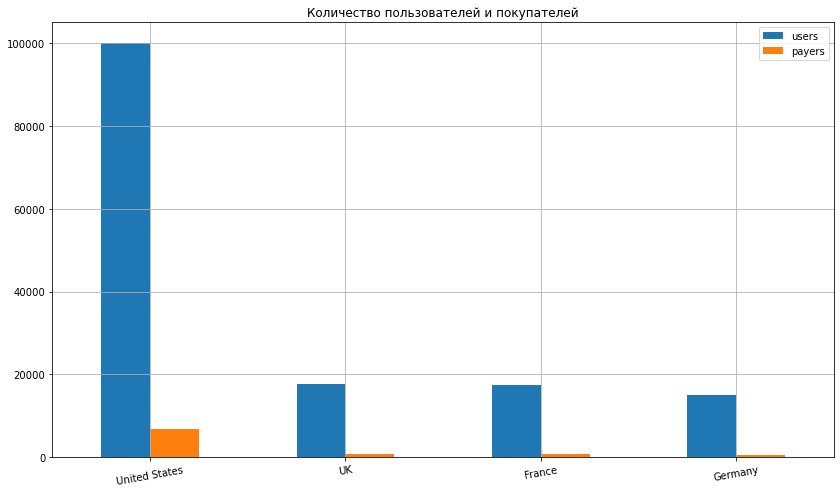

In [19]:
users_payers('region')

### Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?

Пользователей всего: 150008
Покупателей всего: 8881, (5.92 %)


,users,payers,"%, users","%, payers","%, conversion"
iPhone,54479,3382,36.32,38.08,6.21
Android,35032,2050,23.35,23.08,5.85
PC,30455,1537,20.30,17.31,5.05
Mac,30042,1912,20.03,21.53,6.36


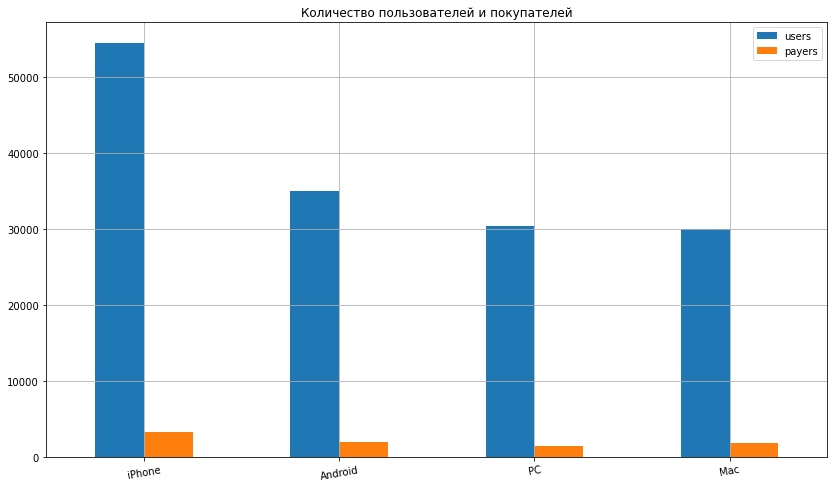

In [20]:
users_payers('device')

### По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

Пользователей всего: 150008
Покупателей всего: 8881, (5.92 %)


,users,payers,"%, users","%, payers","%, conversion"
organic,56439,1160,37.62,13.06,2.06
FaceBoom,29144,3557,19.43,40.05,12.20
TipTop,19561,1878,13.04,21.15,9.60
OppleCreativeMedia,8605,233,5.74,2.62,2.71
LeapBob,8553,262,5.70,2.95,3.06
WahooNetBanner,8553,453,5.70,5.10,5.30
RocketSuperAds,4448,352,2.97,3.96,7.91
MediaTornado,4364,156,2.91,1.76,3.57
YRabbit,4312,165,2.87,1.86,3.83
AdNonSense,3880,440,2.59,4.95,11.34


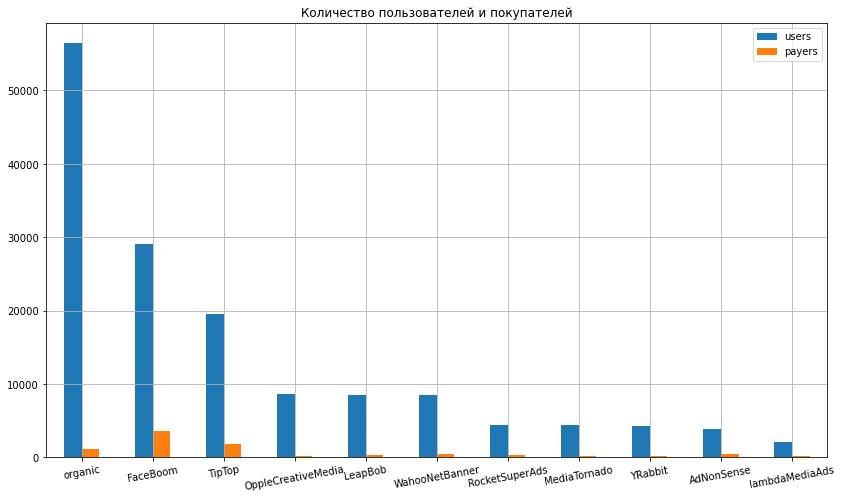

In [21]:
users_payers('channel')

**Вывод:**

Всего пользователей 150008, из них покупателей 8881, конверсия в покупателей 5.9%. Эта конверсия отличается от конверсии для которой мы создаем функции(14-ти дневной), здесь мы берем информацию за весь изучаемый период.

- 67% пользователей приходят из США где самая высокая конверсия 6,9%,
- по используемым устройствам на первом месте iphone: 36% пользователей и конверсия 6,2%, хотя самая высокая конверсия у пользователей Mac - 6,4%,
- всего источников пользователей 11 из них 38% приходят из канала `organic` с конверсией 2%, при этом максимальное количество покупателей приходит из канала `FaceBoom` - 40%, где конверсия максимальна и составляет 12,2%

## Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

### Сколько денег потратили? 


In [22]:
print('Всего потратили денег:', costs['costs'].sum().round())

Всего потратили денег: 105497.0


### Сколько денег потратили на каждый источник? 


### Затраты

In [23]:
# сколько затратили на каждый источник, деньги и %
channel_costs = costs.groupby('channel').agg({'costs':'sum'}).sort_values('costs',ascending=False)
channel_costs['%, costs'] = (channel_costs['costs']/channel_costs['costs'].sum()*100).round(2)
channel_costs

,costs,"%, costs"
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


### Выручка

In [24]:
# количество покупок пользователя и сумма покупок
user_revenue = orders.groupby('user_id').agg({'revenue':['count','sum']})
user_revenue.columns=['count','revenue']

In [25]:
# источник пользователя
user_channel = visits.groupby('user_id').agg({'session_start': 'min', 'channel': 'first'}).drop(columns=['session_start'])

In [26]:
# объединим покупки и источники
users_revenue = user_channel.merge(user_revenue, on='user_id', how='left')
users_revenue = users_revenue.query('revenue > 0')

In [27]:
# сколько принес каждый источник
channel_revenue = users_revenue.groupby('channel').agg({'revenue':'sum'}).sort_values(by='revenue', ascending=False)
channel_revenue['%, revenue'] = (channel_revenue['revenue']/(channel_revenue['revenue'].sum())*100).round(2)
channel_revenue

,revenue,"%, revenue"
channel,,
TipTop,69574.76,32.22
organic,46627.23,21.59
FaceBoom,25637.66,11.87
WahooNetBanner,20006.63,9.26
RocketSuperAds,11598.32,5.37
LeapBob,9560.13,4.43
lambdaMediaAds,8941.70,4.14
OppleCreativeMedia,8365.53,3.87
YRabbit,6201.43,2.87


**Вывод**

Максимальная выручка - 32,2% приходит из канала TipTop

Выручка канала `FaceBoom` составляет всего 11,9%. Ранее мы выяснили, что доля канала `FaceBoom` в покупателях составляет 40% от общего количества. Возможно покупатели из `FaceBoom` мало платят.

### Сколько денег приносит каждый покупатель

In [28]:
# средние расходы пользователя по каналам
revenue_mean = users_revenue.groupby('channel').agg({'revenue':['count','mean']}).round(2)
revenue_mean.columns=['count','mean']
revenue_mean.sort_values('count',ascending=False)

,count,mean
channel,,
FaceBoom,3557,7.21
TipTop,1878,37.05
organic,1160,40.20
WahooNetBanner,453,44.16
AdNonSense,440,8.40
RocketSuperAds,352,32.95
LeapBob,262,36.49
OppleCreativeMedia,233,35.90
lambdaMediaAds,225,39.74


Пользователь из канала `FaceBoom` в среднем тратит 7,2 ден.ед на покупки, аналогичная ситуация с `AdNonSense` - 8,4 ден.ед. В остальных каналах этот показатель варьируется от 33 до 44 ден.ед.

In [29]:
# сколько пользователь в среднем делает покупок
revenue_count = users_revenue.groupby('channel').agg({'count':'mean'})
revenue_count

,count
channel,
AdNonSense,1.552273
FaceBoom,1.330897
LeapBob,6.820611
MediaTornado,6.846154
OppleCreativeMedia,6.639485
RocketSuperAds,6.159091
TipTop,6.935037
WahooNetBanner,8.249448
YRabbit,7.012121


Пользователь из канала `FaceBoom` в среднем делает 1,3 покупки, `AdNonSense` - 1,6. Остальные 6-8.

**Вывод**

Пользователям из `FaceBoom` и `AdNonSense` редко делают повторные покупки.

### Рентабельность продаж

In [31]:
# разница выручки и затрат на рекламу по источникам
channel_profit = (channel_revenue.merge(channel_costs, on='channel', how='left')
                  .fillna(0)
                  .sort_values('revenue', ascending=False))
channel_profit['profit'] = channel_profit['revenue']-channel_profit['costs']
channel_profit['%, profit'] = (channel_profit['profit']/channel_profit['profit'].sum()*100).round(2)

channel_profit

,revenue,"%, revenue",costs,"%, costs",profit,"%, profit"
channel,,,,,,
TipTop,69574.76,32.22,54751.30,51.90,14823.46,13.42
organic,46627.23,21.59,0.00,0.00,46627.23,42.21
FaceBoom,25637.66,11.87,32445.60,30.75,-6807.94,-6.16
WahooNetBanner,20006.63,9.26,5151.00,4.88,14855.63,13.45
RocketSuperAds,11598.32,5.37,1833.00,1.74,9765.32,8.84
LeapBob,9560.13,4.43,1797.60,1.70,7762.53,7.03
lambdaMediaAds,8941.70,4.14,1557.60,1.48,7384.10,6.68
OppleCreativeMedia,8365.53,3.87,2151.25,2.04,6214.28,5.63
YRabbit,6201.43,2.87,944.22,0.90,5257.21,4.76


In [32]:
revenue = channel_profit['revenue'].sum().round()
costs_add = channel_profit['costs'].sum().round()
profit = (channel_profit['revenue'].sum()-channel_profit['costs'].sum()).round()
profitability = (profit/channel_profit['revenue'].sum()*100).round()

print('Выручка от продаж:    ', revenue)
print('Зататы на продажи:    ', costs_add)
print('Операционная прибыль: ', profit)
print('Рентабельность продаж:', profitability,'%')

Выручка от продаж:     215963.0
Зататы на продажи:     105497.0
Операционная прибыль:  110466.0
Рентабельность продаж: 51.0 %


**Вывод:**

Самый выгодный источник это органические пользователи, они приносят 21,6% выучки и 42,2% прибыли.
По платным каналам топ-3:
- `WahooNetBanner`    9,3% выручки, 13,5% прибыли
- `TipTop`           32,2% выручки, 13,2% прибыли
- `RocketSuperAds`    5,4% выручки,  8,8% прибыли

Среди платных каналов присутствуют убыточные результаты:
- `FaceBoom`         11,87% выручки,  6,2% убытков
- `AdNonSense`        1,71% выручки,  0,2% убытков

Пользователи из этих каналов тратят меньше всего денег.

### Сколько денег потратили по времени? 


In [33]:
# затраты по дням
days_costs = (costs.groupby('dt').agg({'costs': 'sum'}))

# продажи по дням
days_revenue = (orders.groupby('dt').agg({'revenue': 'sum'}))

# объединим затраты и продажи 
days_profit = days_costs.merge(days_revenue, on='dt', how='outer')

In [34]:
# посчитаем скользящее среднее по затратам и продажам
window = 14 

days_profit['costs mean, window = 14'] = pd.Series(days_profit['costs']).rolling(window).mean()
days_profit['revenue mean, window = 14'] = pd.Series(days_profit['revenue']).rolling(window).mean()

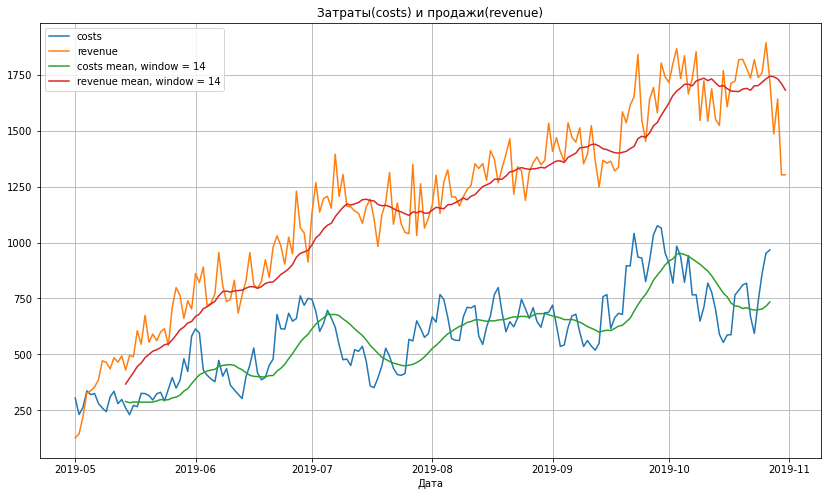

In [35]:
# строим график изменения затрат и продаж
days_profit.plot(grid = True, figsize=(14, 8))
plt.xlabel('Дата')
plt.title('Затраты(costs) и продажи(revenue)')
plt.show()

**Вывод:**

В целом затраты на рекламу растут, продажи тоже растут и превышают затраты на рекламу.

### Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [36]:
# сколько пришло пользователей из каждого источника
# channel_users = profiles.groupby('channel')['user_id'].count()
channel_users = profiles.groupby('channel')['user_id'].nunique()

# проверка количества пользователей
channel_users.sum()

150008

In [37]:
# исключим organic
channel_users = channel_users[channel_users.index != 'organic']

In [38]:
# сколько затратили за каждый источник
channel_costs = costs.groupby('channel')['costs'].sum()

In [39]:
# объединим количество пользователей и затраты по каналам
users_costs = pd.DataFrame({'users': channel_users, 'costs': channel_costs})

# цена привлечения одного пользователя
users_costs['price'] = (users_costs['costs']/users_costs['users'])
users_costs.sort_values(by='price', ascending=False)

,users,costs,price
channel,,,
TipTop,19561,54751.30,2.799003
FaceBoom,29144,32445.60,1.113286
AdNonSense,3880,3911.25,1.008054
lambdaMediaAds,2149,1557.60,0.724802
WahooNetBanner,8553,5151.00,0.602245
RocketSuperAds,4448,1833.00,0.412095
OppleCreativeMedia,8605,2151.25,0.250000
YRabbit,4312,944.22,0.218975
MediaTornado,4364,954.48,0.218717


**Вывод:**

Самые дорогие пользователи привлекаются из канала `TipTop` - 2.8 ден.ед. за одного пользователя,
на втором месте `FaceBoom` - 1.1 ден.ед. за одного пользователя. Минимальные расходы - 0.2 ден.ед. за пользователя из канала `LeapBob`

**Общий вывод:**

Операционная прибыль составляет 110 466 ден.ед.

Рентабельность продаж: 51.0 %

Затраты на рекламу растут, продажи тоже растут и превышают затраты на рекламу.

Максимальная выручка приходит из канала `TipTop` - 32,2%.
Самый выгодный источник `organic` - 21,6% выучки и 42,2% прибыли. 

Самые дорогие пользователи привлекаются из канала `TipTop` - 2.8 ден.ед. за одного пользователя, на втором месте `FaceBoom` - 1.1 ден.ед. за одного пользователя.

Каналы `FaceBoom` и `AdNonSense` являются убыточными.

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Cчитаем бизнес-показатели

Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI.

In [40]:
# исключим из расчетов органических пользователей оставим только рекламных

adv_profiles = profiles.query('channel != "organic"')

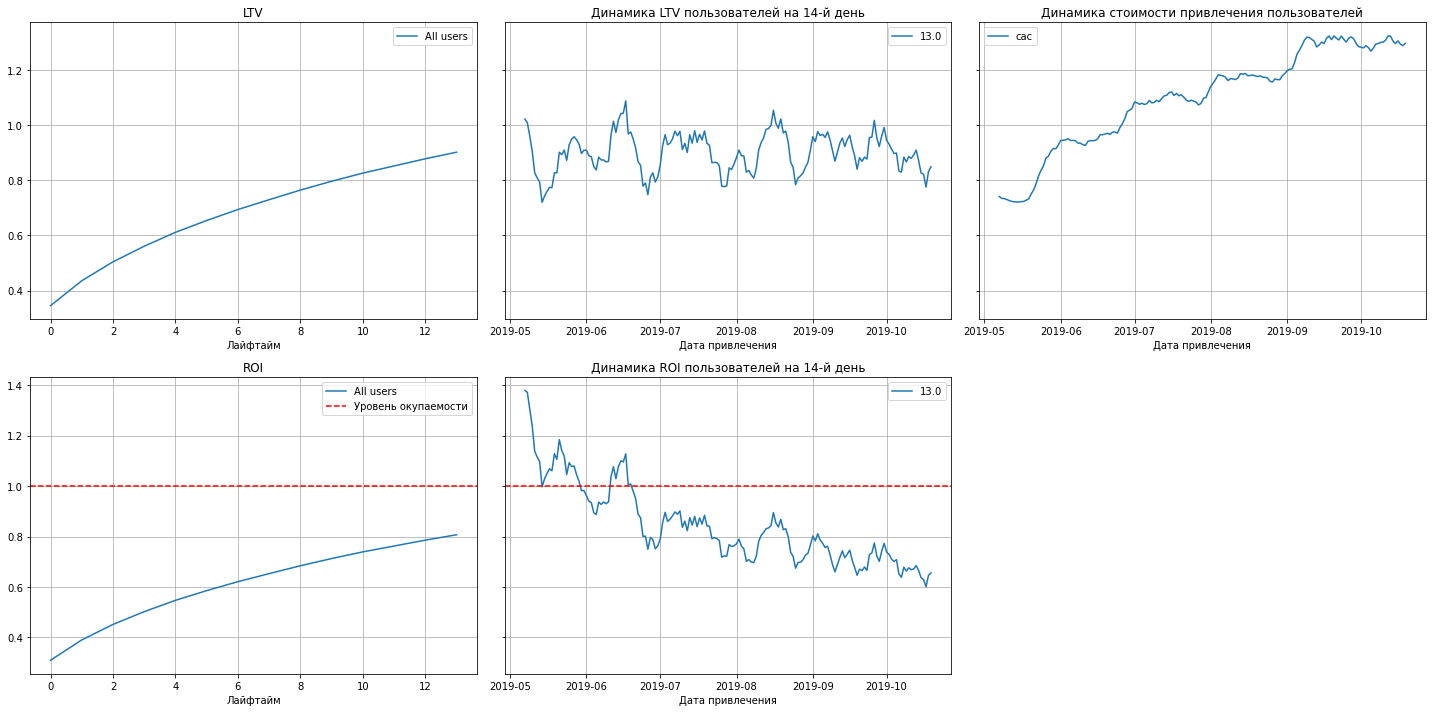

In [41]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    adv_profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать такие выводы:
- Реклама не окупается. ROI далеко до уровня окупаемости.
- Стоимсть привлечения новых пользователей растет. Значит, идет увеличение  рекламного бюджета.
- LTV достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
- Динамика ROI на 14-й день снижается.

**Вывод**

Пользователи стабильно приносят деньги, но стоимость их привлечения растет, в результате окупаемость падает.
Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

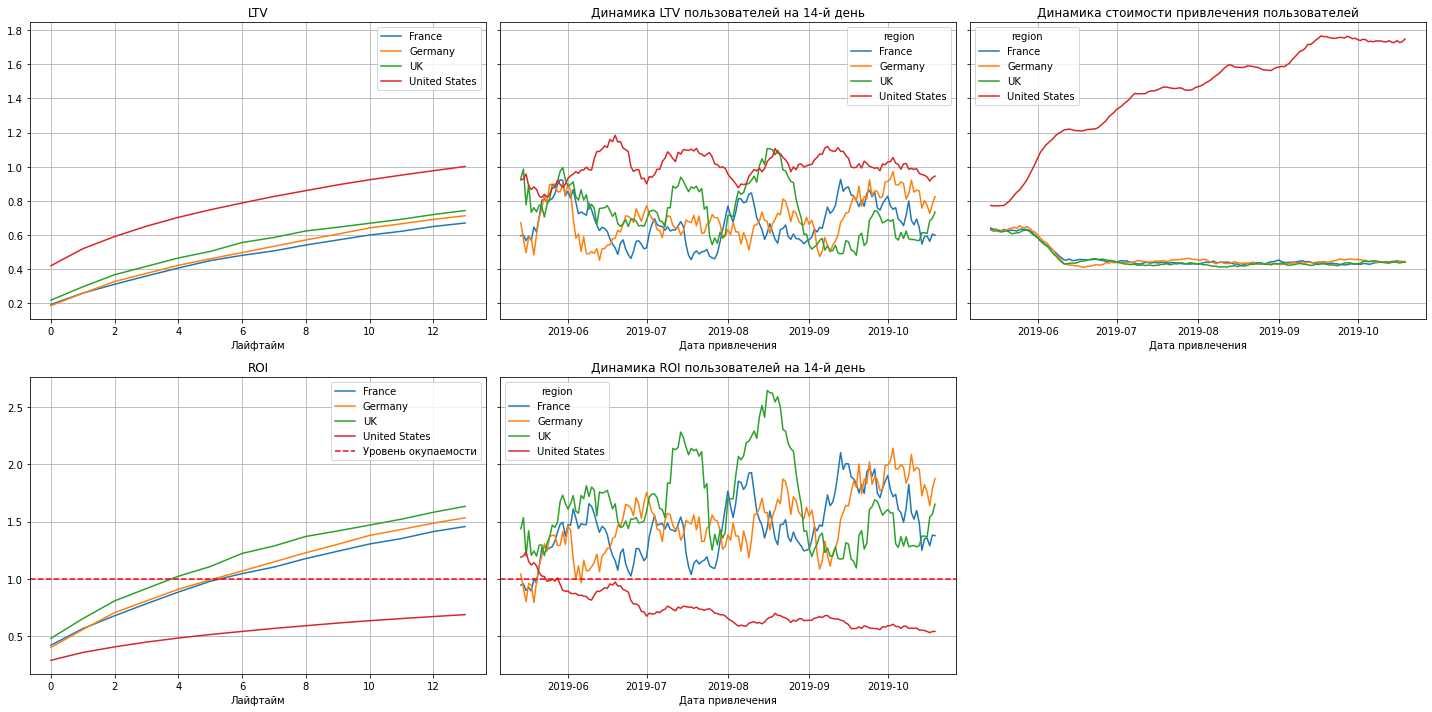

In [42]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    adv_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Из разбивки по странам можно сделать следующие выводы:
- Больше всего клиентов приходит из США
- Реклама:
    - окупается во Франции, Германии и Британии,
    - не окупается в США.
- Стоимость привлечения:
    - стабильна во Франции, Германии и Британиии и почти одинакова,
    - резко растет в США.
- LTV подвержен изменениям, но более-менее стабилен,
- Динамика ROI пользователей на 14-й день:
    - стабильно выше окупаемости во Франции, Германии и Британиии
    - падает ниже окупаемости в США.

**Вывод:**
Из разбивки по странам видно, что явная просадка по окупаемости в США, требуется глубже посмотреть с чем это связано.

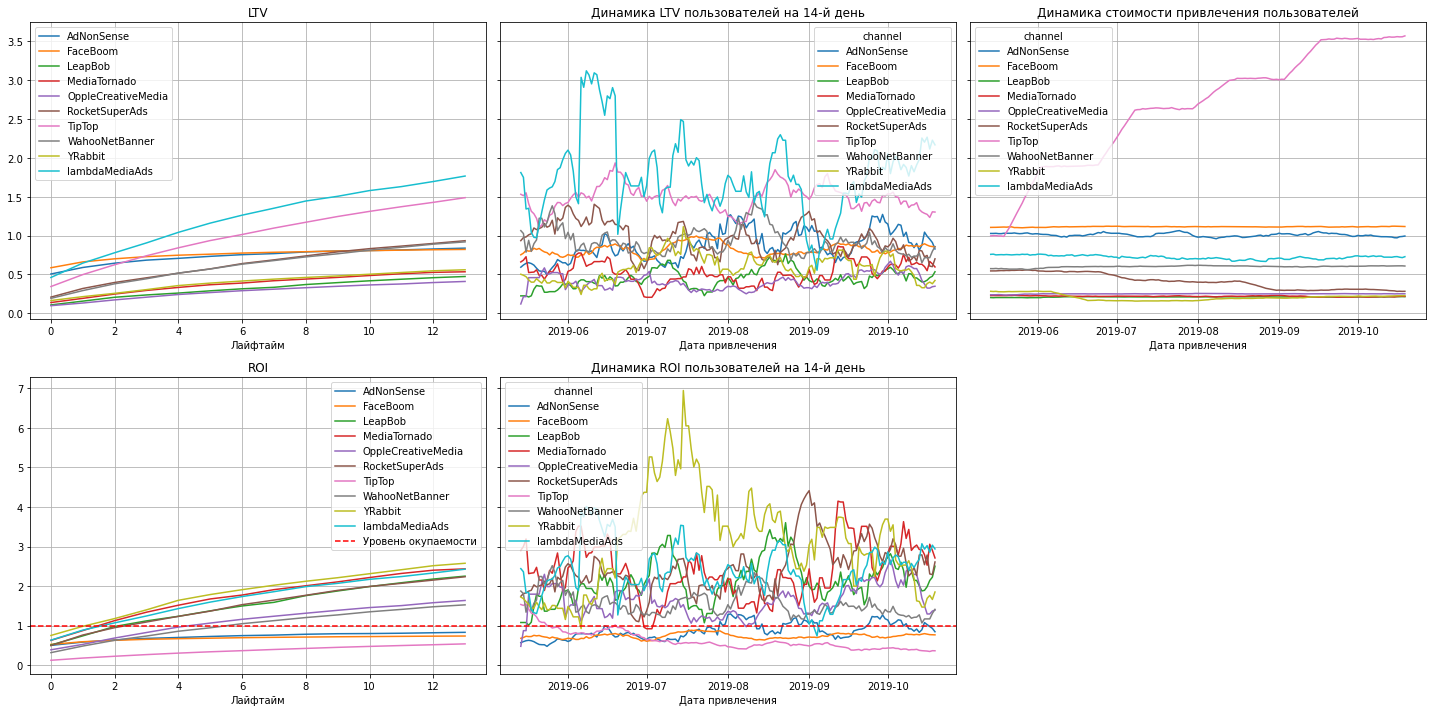

In [43]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    adv_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Из разбивки по источникам привлечения можно сделать основной выводы - резко растет стоимость привлечения из канала `TipTop`. `ROI` ниже уровня окупаемости: `TipTop`, `FaceBoom`, `AdNonSense`

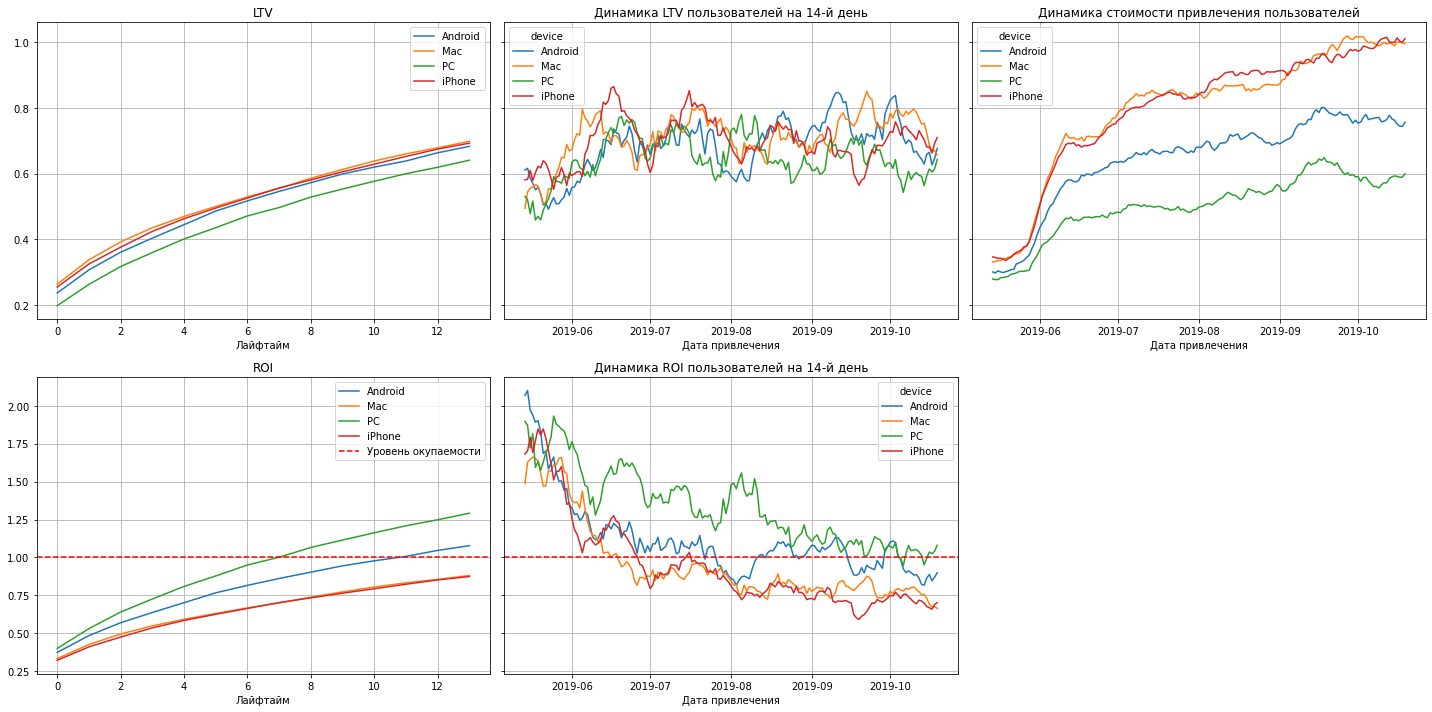

In [44]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Из разбивки по по устройствам видим, что пользователи PC и Android стабильно окупаются, а  владельцы  Mac и iPhone нет, что связано с более высокой динамикой стоимости привлечения пользователей

Узнаем, в чём причина: в низкой конверсии или низком удержании.

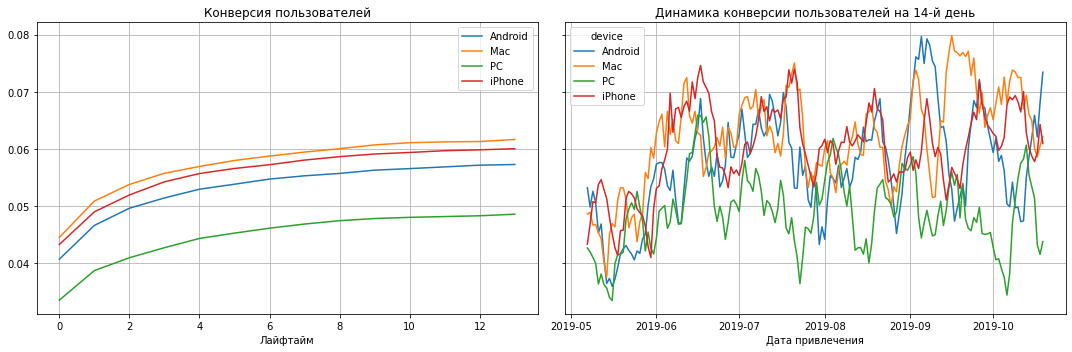

In [45]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Судя по графикам, конверсия пользователей Mac и iPhone самая высокая. Проверим удержание.

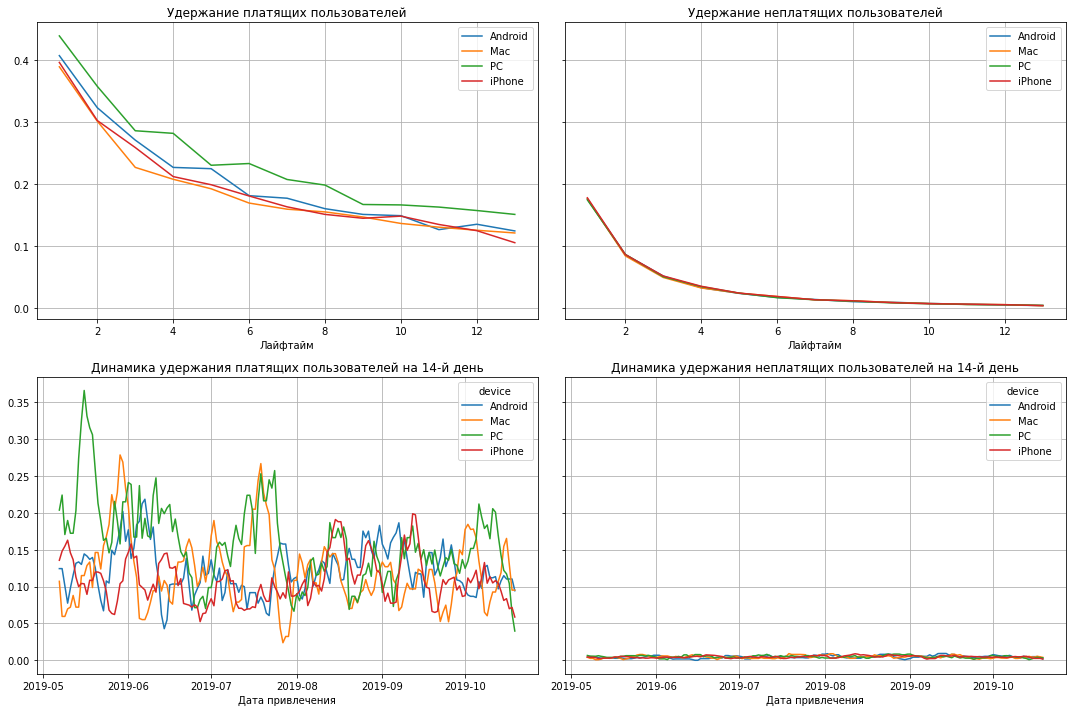

In [46]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

В целом, чуть выделяются пользователи PC. Но удержание сильно не влияет на результат.

**Вывод**

Явный дисбаланс наблюдается в США, где резко растет динамика стоимости привлечения пользователей. Аналогичная ситуация наблюдается в канале `TipTop`, где так же растет стоимость привлечения пользователей.

Имеет смысл более подробно рассмотреть оба этих направления.

In [47]:
# Проверим источник пользователей в разрезе канала и страны

profiles.pivot_table(index='channel', columns='region', values='user_id', aggfunc='count').fillna(0)

region,France,Germany,UK,United States
channel,,,,
AdNonSense,1366.0,1219.0,1295.0,0.0
FaceBoom,0.0,0.0,0.0,29144.0
LeapBob,2988.0,2519.0,3046.0,0.0
MediaTornado,0.0,0.0,0.0,4364.0
OppleCreativeMedia,2991.0,2562.0,3052.0,0.0
RocketSuperAds,0.0,0.0,0.0,4448.0
TipTop,0.0,0.0,0.0,19561.0
WahooNetBanner,2971.0,2579.0,3003.0,0.0
YRabbit,0.0,0.0,0.0,4312.0


**Вывод**

Рекламные каналы в США не совпадают с рекламными каналами в Европе. Так как на США приходится 66% всех пользователей, посмотрим, что может стать причиной убытков.

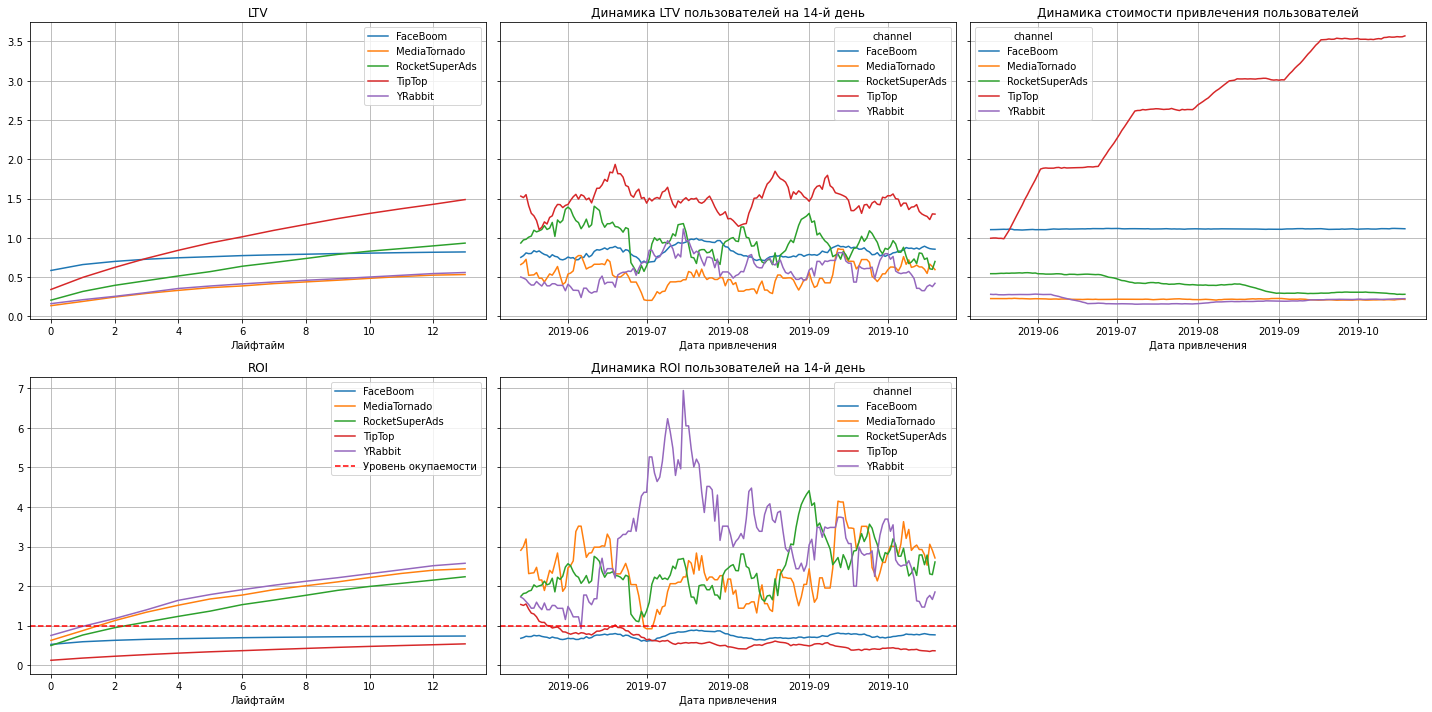

In [48]:
# выделим из профилей пользователей регион United States и посмотрим на каналы привлечения
profiles_usa = adv_profiles.query('region == "United States"')

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Из графиков видим, что высокие расходы на привлечение в каналах `FaceBoom` и `TipTop`. При этом в канале `TipTop` динамика стоимости привлечения ещё и растет.

# Шаг 6. Выводы

Во время исследования мы выяснили, что всего зарегистрировано 150 008 пользователей 6% из которых сделали покупки.

Пользователи приходят из 4 стран. Больше всего пользователей приходит из США 67%, конверсия в покупатели составляет 6,9%.
Из США приходит 77% покупателей.

По используемым устройствам на первом месте `iphone`: 36% пользователей и конверсия 6,2%, хотя самая высокая конверсия у пользователей `Mac` - 6,4%,

Максимальная выручка приходит из канала `TipTop` - 32,2%.
Самый выгодный источник `organic` - 21,6% выучки и 42,2% прибыли. 

Операционная прибыль составляет 110 466 ден.ед.

Рентабельность продаж: 51.0 %

Затраты на рекламу растут, продажи тоже растут и превышают затраты на рекламу.

Самые дорогие пользователи привлекаются из канала `TipTop` - 2.8 ден.ед. за одного пользователя, на втором месте `FaceBoom` - 1.1 ден.ед. за одного пользователя.

В процессе анализа бизнес-показателей мы выяснили, что причинами низкой окупаемости является:
- высокая стоимость привлечения пользователей из каналов `TipTop` и `FaceBoom`,
- рост цены привлечения `TipTop`,
- низкое количество повторных покупок каналов `FaceBoom` и `AdNonSense`(как результат их убыточность).

Окупаемость с разбивкой по устройствам на результаты особо не влияет.

Отделу маркетинга необходимо:
- разобраться с растущей динамикой привлечения пользователей `TipTop`, пока он прибылен но это может поменяться,
- изучить как повлиять на привлечение `organic` пользователей, на них приходится 42% прибыли при минимальной конверсии,
- больше вкладывать в канал `WahooNetBanner`, тк он на первом месте по прибыли из рекламных каналов,
- изучить вопрос с повторными покупками в `FaceBoom` он приносит 40% продаж, у него максимальная конверсия в покупателей 12,2% и он убыточен,
- аналогично разобраться с повторными покупками в `AdNonSense`.